<h1 style="text-align: center; color: red;">Real Estate Price Prediction Project</h1>
<p style="text-align: center; color: blue;">Machine Learning & Data Science Project</p>

<h3 style="color: green;">Author: </h3>
<p>TATI Mohammed, Data Engineering Student</p>

<h2>Importing all libraries required

In [1]:
# Manipulating the data
import pandas as pd
import numpy as np
import copy

# Visualisation
import matplotlib.pyplot as plt

<h2>Creating a Dataframe from the .csv file

In [2]:
# the .csv file 
file = 'Bengaluru_House_Data.csv'

# Creating a DataFrame
data = pd.read_csv(file)

# Showing the first five rows
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<h2>Data Wrangling

In [3]:
print(f'The number of samples : {data.shape[0]}')
print(f'The number of features : {data.shape[1]}')

The number of samples : 13320
The number of features : 9


In [4]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
data.corrwith(data.price)

bath       0.456345
balcony    0.120355
price      1.000000
dtype: float64

<h3>Notice :

+ As we can see we have some <b>missing data</b>.
+ Also we can see that there is some features we don't need to predict the prices. So we will get rid of them.
+ Balcony has only <b>12%</b> correlation with the price so we will not use it.

<h5>Dropping columns

In [6]:
# Making a copy
data1 = data.copy()

# Drop columns
data1.drop(['balcony', 'society', 'availability', 'area_type'], axis=1, inplace=True)
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


<h5>Handling the missing data

In [7]:
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

<h3>Notice :

+ We have like 13k samples and missing values too small so we can just drop these columns.

In [8]:
data1.dropna(inplace=True)

<h5>Checking for duplicate rows

In [9]:
# Checking.
print(f'The number of duplicate rows : {data1.duplicated().sum()}')

The number of duplicate rows : 881


In [10]:
# Getting rid of them
data1.drop_duplicates(inplace= True)

# Checking.
print(f'The number of duplicate rows : {data1.duplicated().sum()}')

The number of duplicate rows : 0


<h5>Checking the data types

In [11]:
data1.describe()

,bath,price
count,12365.000000,12365.000000
mean,2.719693,115.229230
std,1.369955,153.201909
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,73.870000
75%,3.000000,123.000000
max,40.000000,3600.000000


<h3>Notice :
    

+ We can see that we don't have the <b>total_sqft</b> features because it's not a number so we have to deal with that problem by cleaning the data.

In [12]:
# This is a function to return the float data in this feature
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

<h5>Handling the total_sqft data

In [13]:
data1[~data1['total_sqft'].apply(is_float)].head(6)

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500


In [14]:
# Function to convert total_sqft like 2100 - 2850 to float number
def convert_to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return float(float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [15]:
# Making a copy
data2 = data1.copy()

# Conveting 
data2['total_sqft'] = data2['total_sqft'].apply(convert_to_float)

#Checking
data2.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
Name: 30, dtype: object

In [16]:
data2.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
dtype: int64

<h5>Drop null values

In [17]:
data2.dropna(inplace=True)
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00
2,Uttarahalli,3 BHK,1440.0,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00
4,Kothanur,2 BHK,1200.0,2.0,51.00


<h2>Features Engineering

<h3>Notice :

+ We need to add a feature that have the numbers <b>int</b> of bhk because the size feature is a <b>object</b>.
+ Also we will need the <b>price per sqft</b>. So let's add these features.

<p style="color: blue;">2BHK or two bedroom house means 2 bedroom, 2 hall, 1 kitchen, 2 toilet, 1 dining/ living room and circulating area for passage those covering of approximately 650 to 800 sq ft of carpet area.</p>

In [18]:
# Making a copy
data3 = data2.copy()

# Adding the BHK column.
data3['bhk'] = data3['size'].apply(lambda x: int(x.split(' ')[0]))

# Adding the Price per SQFT column.
data3['price_per_sqft'] = (data3['price'] * 100000) / data3['total_sqft']

# Add some cleaning to the data
data3['location'] = data3['location'].apply(lambda x: x.strip())

#Checking
data3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


<h5>Let's check how much locations that wa have.

In [19]:
print(f'Number of locations : {len(data3.location.unique())}')

Number of locations : 1287


<h3>Notice :

+ This is a huge number. So we need to reduce it, one of the methods that we can use is the 'other'. we will see the number of rows for each location then the locations that have less than 10 sample will change it to 'other'. 

In [20]:
# Making a copy
data4 = data3.copy()

# Sorting the number of rows for each location
loaction_num = data4.groupby('location')['location'].agg('count').sort_values(ascending=False)
loaction_num

location
Whitefield               500
Sarjapur  Road           357
Electronic City          275
Thanisandra              224
Kanakpura Road           215
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [21]:
print(f"The number of locations that has less than 10 data point is {len(loaction_num[loaction_num <=10])}")

The number of locations that has less than 10 data point is 1057


In [22]:
# Changing all locations that have less than 10 to 'other' categorie.

# Variable to store these locations
locations_less_than_10 = loaction_num[loaction_num <=10]

# Changing the values
data4['location'] = data4['location'].apply(lambda x: 'other' if x in locations_less_than_10 else x)

# The number of unique values after the transformation.
print(f'The OLD number of locations : {len(data3.location.unique())}')
print(f'The NEW number of locations : {len(data4.location.unique())}')

The OLD number of locations : 1287
The NEW number of locations : 231


<h2>Handling the outliers

In [23]:
data4.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


<h3>Notice :
    

+ We know that <b>2 bhk</b> has like <b>650-800 sqft</b>, which mean <b>1 bhk</b> has like minimum <b>325 sqft</b>.

In [24]:
# Error example
data4[data4.total_sqft / data4.bhk < 325].head(7)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268


In [25]:
data4.loc[78]

location          Kaval Byrasandra
size                         2 BHK
total_sqft                   460.0
bath                           1.0
price                         22.0
bhk                              2
price_per_sqft         4782.608696
Name: 78, dtype: object

<p style="color: red">for example this data point has 2 bhk in 460 sqft which is unusual. So we will get rid of this errors. 

In [26]:
# Making a NEW dataframe without these errors.
data5 = data4[data4.total_sqft / data4.bhk >= 325]

# The diffrent
print(f'The OLD number of samples : {data4.shape[0]}')
print(f'The NEW number of samples : {data5.shape[0]}')

The OLD number of samples : 12319
The NEW number of samples : 11360


In [27]:
data5.price_per_sqft.describe()

count     11360.000000
mean       6291.398823
std        4147.655469
min         267.829813
25%        4242.424242
50%        5307.826118
75%        6896.551724
max      176470.588235
Name: price_per_sqft, dtype: float64

<p style="color: red">We can see that the min value is <b>267</b> for sq ft which is unlikely also <b>176000</b> for sq ft. So we will make a function to remove the outliers

In [28]:
# Function to remove the outliers
def remove_ouliers(x):
    # x is DataFrame
    x_out = pd.DataFrame()
    for key, subx in x.groupby('location'):
        m = np.mean(subx.price_per_sqft)
        st = np.std(subx.price_per_sqft)
        reduced_x = subx[(subx.price_per_sqft > (m - st)) & (subx.price_per_sqft <= (m + st))]
        x_out = pd.concat([x_out, reduced_x], ignore_index=True)
    return x_out

# Calling the function and creating a new dataframe
data6 = remove_ouliers(data5)

# The diffrent
print(f'The OLD number of samples : {data5.shape[0]}')
print(f'The NEW number of samples : {data6.shape[0]}')

The OLD number of samples : 11360
The NEW number of samples : 9278


<h3>Detecting outliers by visualization

In [29]:
data6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


Text(0, 0.5, 'Count')

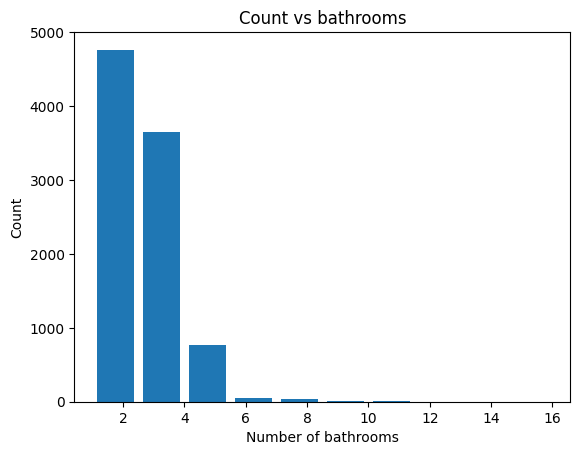

In [30]:
# this function to make a scatter for a location 
plt.hist(data6.bhk, rwidth= 0.8)
plt.title('Count vs bathrooms')
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

<p style="color: red;">We can see that the majorety of the samples have less then 5 bathrooms, which mean there is some outliers. So we will get rid of them by removing the samples that have the number of bath greater than (bhk+2).

<h5>let's see first what is going on.

In [31]:
data6[data6.bath > data6.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1401,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
4596,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5923,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7490,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


<p style="color: red;">As we can see for example the sample <b>1401</b> have <b>4 bedrooms</b> but <b>7 bathrooms</b> which is unusual. So we will filter our data based on this statistics.

In [32]:
# Creating a new dataframe filtered.
data7 = data6[~(data6.bath > data6.bhk + 2)]

#checking
print(f'The OLD number of samples : {data6.shape[0]}')
print(f'The NEW number of samples : {data7.shape[0]}')

The OLD number of samples : 9278
The NEW number of samples : 9274


<h2>Building our model

<p style="color: blue;">Now that we have finished the data cleaning process we will remove the addition features to be ready for making our predicting model.

In [33]:
# Making a copy
data8 = data7.copy()

# Drop columns
data8.drop(['size', 'price_per_sqft'], axis=1, inplace=True)
data8.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


<p style="color: red;">We know that we can use describtive value in the model so we have to change these values to numbers. We will use <b>ONE-HOT encoding</b> for this porpuse. 

In [34]:
# Making a copy
data9 = data8.copy()

# one-hot encoding
dummies = pd.get_dummies(data9.location)
dummies.head(20)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# Making our dataframe
data10 = pd.concat([data9, dummies], axis=1)
data10.head(20)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Phase JP Nagar,2825.0,4.0,250.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,2065.0,4.0,210.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Input data
X = data10.drop(['price', 'location'], axis=1)
X.tail()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
9273,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9274,1095.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9275,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9276,1075.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9277,3600.0,5.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
# Output data.
y = data10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [38]:
# Required libraies for ML

# Algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

# Spliting the data
from sklearn.model_selection import train_test_split

# Testing the model
from sklearn.metrics import mean_absolute_error

<h2>Model Selection

In [39]:
# Finding the best algorithm.
def best_algo(X, y):
    # Return
    df_out = {'model': [], 'score': [], 'mean absolute error': [], 'random state': []}
    
    # List of algos:
    algos = [DecisionTreeRegressor(), LinearRegression(), Lasso(), RandomForestRegressor()]
    
    # List of random states:
    rnd_stt = range(0,21)
    
    for algo in algos:
        for r in rnd_stt:
            # By using train_test_split we will split our data so we train and test our model. 
            x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=r)
            # Fitting the model
            model = algo.fit(x_train, y_train)
        
            # filling the dataframe
            df_out['model'].append(f'{algo}')
            df_out['score'].append(model.score(x_val, y_val))
            df_out['random state'].append(r)
                # We will predict from the validation data
            y_predicted = model.predict(x_val) 
            df_out['mean absolute error'].append(mean_absolute_error(y_val, y_predicted))
    
    return pd.DataFrame(df_out)

# The best score per model 
def models_max_score(df):
    # To store the list of models
    list_model = df.model.unique()
    
    # To store the best model's accuracy
    best_model = []
    
    for model in list_model:
        # Max score for each model
        max_score = df[df.model == model].score.max()
        
        # Saving the models data 
        best_model.append(df[(df.model == model) & (df.score == max_score)])
        
    return pd.concat(best_model)

# Calling the function
algos_data = best_algo(X, y)
models_max_score(algos_data) 

,model,score,mean absolute error,random state
20,DecisionTreeRegressor(),0.846872,21.631784,20
25,LinearRegression(),0.898211,20.516788,4
50,Lasso(),0.811701,25.284555,8
76,RandomForestRegressor(),0.865885,17.298333,13


<p style="color: blue;">As we can see the must accurate model is <b>Linear Regression</b> with <b>random state = 4</b> & <b>test_size=0.1</b>.

In [40]:
# By using train_test_split we will split our data so we train and test our model. 
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=4)

# Implementing the model
model = LinearRegression()

# Fitting the model
model.fit(x_train, y_train)

# Score
print(f'The model accuracy is {model.score(x_val, y_val) * 100:.2f} %')

The model accuracy is 89.82 %


<h2>Exporting the model & data columns.

In [41]:
# To explore the model
import pickle

In [42]:
with open('Real Estate Price Prediction.pickle', 'wb') as f:
    pickle.dump(model, f)

In [43]:
import json

cols = {'data_cols': [col.lower() for col in X.columns]}
with open('columns.json', 'w') as f:
    f.write(json.dumps(cols))

<p style="font-size: 20px;">Over.              TATI